## Gait-Analysis-using-CNN 

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.15.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Extracting the Activity Labels

In [45]:
with open('/home/awkward_iitian/semusi_intern/UCI HAR Dataset/train/y_train.txt', 'r') as file:
    lines = file.readlines()

data = []

for line in lines:
    numbers = line.split()
    row_data = [float(num) for num in numbers]
    
    data.append(row_data)

column_names = ['activity_label']

df_1 = pd.DataFrame(data, columns=column_names)

In [46]:
df_1.head()

,activity_label
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [47]:
df_1.shape

(7352, 1)

In [48]:
df_1['activity_label'].dtype

dtype('float64')

### Chedking the Relative balance. 

In [49]:
df_1['activity_label'].value_counts()

activity_label
6.0    1407
5.0    1374
4.0    1286
1.0    1226
2.0    1073
3.0     986
Name: count, dtype: int64

##### the relative balance is good enough to continue upon.

### Extracting the value of Features (sequence as in the features.txt).

In [50]:
with open('/home/awkward_iitian/semusi_intern/UCI HAR Dataset/train/X_train.txt', 'r') as file:
    lines = file.readlines()

data = []

for line in lines:
    numbers = line.split()
    row_data = [float(num) for num in numbers]
    
    data.append(row_data)

column_names = [f'var{i+1}' for i in range(len(data[0]))]

df_2 = pd.DataFrame(data, columns=column_names)

In [51]:
df_2.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var552,var553,var554,var555,var556,var557,var558,var559,var560,var561
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [53]:
df_2.shape

(7352, 561)

In [54]:
merged_df = pd.concat([df_2, df_1], axis=1)

In [55]:
merged_df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var553,var554,var555,var556,var557,var558,var559,var560,var561,activity_label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5.0


In [57]:
merged_df['activity_label'].value_counts()

activity_label
6.0    1407
5.0    1374
4.0    1286
1.0    1226
2.0    1073
3.0     986
Name: count, dtype: int64

In [67]:
X = merged_df.iloc[:, :561]  
y = merged_df['activity_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)
scaled_df['activity_label'] = y.values

In [68]:
scaled_df

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var553,var554,var555,var556,var557,var558,var559,var560,var561,activity_label
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,5.0
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,5.0
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,5.0
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,5.0
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.876738,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,2.0
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,-0.260847,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,2.0
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,1.034784,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,2.0
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,1.155541,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276,2.0


## Prepping the Model Frame.


In [87]:
import scipy.stats as stats

In [104]:
Fs = 50
frame_size = Fs*2 
hop_size = Fs*1

In [105]:
import numpy as np
from scipy import stats

def get_frames(df, frame_size, hop_size, feature_cols, label_col):

    N_FEATURES = 561

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        frame_data = []
        for col in feature_cols:
            frame_data.append(df[col].values[i: i + frame_size])
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df[label_col][i: i + frame_size])[0][0]
        frames.append(frame_data)
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels


In [106]:
var_list = ['var' + str(i) for i in range(1, 562)]

In [107]:
X, y = get_frames(scaled_df, frame_size, hop_size, var_list, 'activity_label')

In [108]:
X.shape, y.shape

((146, 100, 561), (146,))

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [110]:
X_train.shape, X_test.shape

((116, 100, 561), (30, 100, 561))

In [113]:
X_train[0].shape, X_test[0].shape

((100, 561), (100, 561))

In [119]:
X_train = X_train.reshape(116, 100, 561, 1)
X_test = X_test.reshape(30, 100, 561, 1)

## CNN Model.


In [120]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))


In [121]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [122]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
4/4 [==============================] - 10s 1s/step - loss: 76.2159 - accuracy: 0.3707 - val_loss: 48.4745 - val_accuracy: 0.5667
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 53.0896 - accuracy: 0.4138 - val_loss: 35.3047 - val_accuracy: 0.4667
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 26.9591 - accuracy: 0.5000 - val_loss: 6.9044 - val_accuracy: 0.6333
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 7.6823 - accuracy: 0.5345 - val_loss: 4.6608 - val_accuracy: 0.4667
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 3.0594 - accuracy: 0.5431 - val_loss: 2.9522 - val_accuracy: 0.5333
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 1.6523 - accuracy: 0.5948 - val_loss: 2.2759 - val_accuracy: 0.6000
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 1.6282 - accuracy: 0.6034 - val_loss: 1.9579 - val_accuracy: 0.6000
Epoch 8/10
4/4 [===================

## Plotting and Comparing through Graph.

In [133]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


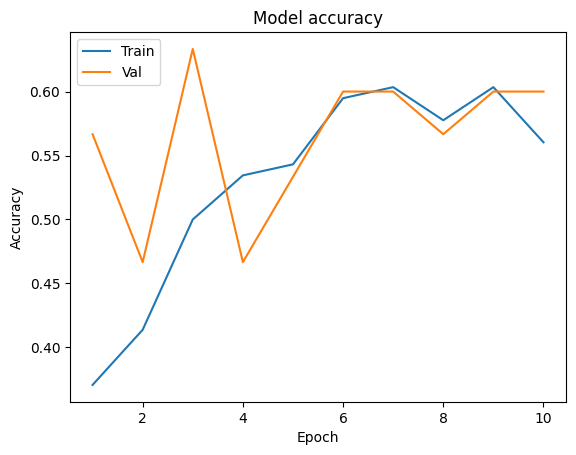

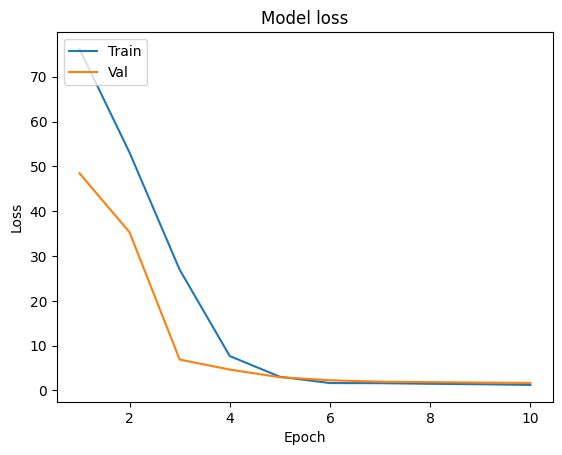

In [134]:
 plot_learningCurve(history, 10)